In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import quantumpropagator as qp
from quantumpropagator import readWholeH5toDict, abs2
#from __future__ import print_function
from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets

def heatThis(h5File,gams,thes,vmaxV,state,save=None):
    save = save or False
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    wf   = qp.retrieve_hdf5_data(h5File,'WF')[:,:,state]
    time = qp.retrieve_hdf5_data(h5File,'Time')[0]
    fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
    plt.title('Time = {:10.5f} fs'.format(time))
    plt.xlabel('Gamma')
    plt.ylabel('Theta')
    
    # this is to get a nice colorbar on the side
    ax = plt.gca()
    aaa = np.rad2deg
    ext = [aaa(gams[0]),aaa(gams[-1]),aaa(thes[0])*2,aaa(thes[-1])*2]
    im = ax.imshow(qp.abs2(wf), extent=ext, cmap='hot', vmax=vmaxV)
    #im = ax.imshow(qp.abs2(wf), cmap='PuBu_r', vmax=0.4)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    plt.colorbar(im, cax=cax)
    
    if save:
        fig.savefig(os.path.splitext(h5File)[0] + '.png')
        plt.close()
    
def f(frame,state):
    return heatThis(os.path.join(a,filesList[frame]),gams,thes,vmaxV,state)

In [2]:
subfolders = sorted([ dir for dir in os.listdir('.') if os.path.isdir(dir) and dir != '.ipynb_checkpoints'])
print(''.join(['{} -> {}\n'.format(a,b) for a,b in enumerate(subfolders)]))

0 -> input_FinerGrid_0000



In [3]:
a = subfolders[-1]

In [4]:
filesList = [ fn for fn in sorted(os.listdir(a)) if fn[:8] == 'Gaussian' and fn[-3:] == '.h5']
outh5 = os.path.join(a,'allInput.h5')
dictio = readWholeH5toDict(outh5)
gams,thes = dictio['gams'],dictio['thes']
lastV = len(filesList)-1
# dictio.keys()
zeroWF = qp.retrieve_hdf5_data(os.path.join(a,filesList[0]),'WF')
vmaxV = abs2(zeroWF).max()
gamL,theL,nstates = (qp.retrieve_hdf5_data(os.path.join(a,filesList[0]),'WF')).shape
gamsT = np.rad2deg(gams)
thesT = np.rad2deg(thes)*2

In [5]:
interact(f, frame = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV),state = widgets.IntSlider(min=0,max=nstates-1,step=1,value=0));
createimages = False

if createimages:
    for filn in filesList:
        filna = os.path.join(a,filn)
        heatThis(filna, gams, thes, vmaxV, save=True)
        

interactive(children=(IntSlider(value=90, description='frame', max=90), IntSlider(value=0, description='state'…

# 1d slices

In [6]:
def sliceGammas(h5File, gamma, exa):
    wf  = qp.retrieve_hdf5_data(h5File,'WF')
    fig = plt.figure(figsize=(11, 6), dpi= 80, facecolor='w', edgecolor='k')
    ys = wf[gamma,:]*exa
    time = qp.retrieve_hdf5_data(h5File,'Time')[0]
    plt.title('Time = {:10.5f} fs --- gammaL = {:8.3f}'.format(time,gamsT[gamma]))
    plt.ylim(-0.5,0.5)
    plt.plot(thesT, np.real(ys), linewidth=1,ls='--')
    plt.plot(thesT, np.imag(ys), linewidth=1,ls='--')
    plt.plot(thesT, abs2(ys), linewidth=3,ls='-')

def sliceThetas(h5File, theta, exa):
    wf  = qp.retrieve_hdf5_data(h5File,'WF')
    fig = plt.figure(figsize=(11, 6), dpi= 80, facecolor='w', edgecolor='k')
    ys = wf[:,theta]*exa
    time = qp.retrieve_hdf5_data(h5File,'Time')[0]
    plt.title('Time = {:10.5f} fs --- thetaL = {:8.3f}'.format(time,thesT[theta]))
    plt.ylim(-0.5,0.5)
    plt.plot(gamsT, np.real(ys), linewidth=1,ls='--')
    plt.plot(gamsT, np.imag(ys), linewidth=1,ls='-.')
    plt.plot(gamsT, abs2(ys), linewidth=3,ls='-')    
    
def fgam(file_number,gamma,exa):
    return sliceGammas(os.path.join(a, filesList[file_number]), gamma, exa)

def fthe(file_number,theta,exa):
    return sliceThetas(os.path.join(a, filesList[file_number]), theta, exa)

In [7]:
interact(fgam, file_number = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV), gamma = widgets.IntSlider(min=0,max=gamL-1,step=1,value=10), exa = widgets.IntSlider(min=1,max=10,step=1,value=1));

interactive(children=(IntSlider(value=90, description='file_number', max=90), IntSlider(value=10, description=…

In [8]:
interact(fthe, file_number = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV), theta = widgets.IntSlider(min=0,max=theL-1,step=1,value=16), exa = widgets.IntSlider(min=1,max=10,step=1,value=1));

interactive(children=(IntSlider(value=90, description='file_number', max=90), IntSlider(value=16, description=…

In [9]:
outfn = os.path.join(a,'output')
outfnP = os.path.join(a,'outputPopul')

In [10]:
data = pd.read_csv(outfn, delim_whitespace=True, header=None);
dataP = pd.read_csv(outfnP, delim_whitespace=True, header=None);
data.columns = ['steps','fs','Norm Deviation','Kinetic','Potential','Total','Total deviation','Xpulse','Ypulse','Zpulse']

In [11]:
result = pd.concat([data, dataP], axis=1)
result

,steps,fs,Norm Deviation,Kinetic,Potential,Total,Total deviation,Xpulse,Ypulse,Zpulse,0,1,2,3,4,5,6,7,8
0,0,0.000000,0.000000e+00,0.064274,0.102784,0.167058,0.000000e+00,3.719408e-09,3.719408e-09,3.719408e-09,0.0000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,10,0.100099,7.439902e-08,0.064406,0.102651,0.167058,5.063434e-08,4.264817e-09,4.264817e-09,4.264817e-09,0.1001,1.000000,8.399130e-17,3.471140e-23,9.187820e-28,5.760610e-18,2.717300e-18,5.488230e-18,5.394270e-18
2,20,0.200199,2.973275e-07,0.064774,0.102284,0.167058,2.018002e-07,-1.908942e-09,-1.908942e-09,-1.908942e-09,0.2002,0.999999,1.641490e-16,6.381730e-23,1.712370e-27,1.099550e-17,4.849570e-18,9.810940e-18,9.815720e-18
3,30,0.300298,6.680473e-07,0.065309,0.101748,0.167057,4.517627e-07,-1.728873e-08,-1.728873e-08,-1.728873e-08,0.3003,0.999999,5.774520e-16,3.388610e-22,8.334470e-27,4.747990e-17,2.721650e-17,5.495340e-17,5.307620e-17
4,40,0.400397,1.185480e-06,0.065959,0.101099,0.167057,7.985574e-07,-3.270009e-08,-3.270009e-08,-3.270009e-08,0.4004,0.999998,6.128880e-15,2.593600e-21,6.641390e-26,4.309960e-16,1.874990e-16,3.756030e-16,3.862950e-16
5,50,0.500496,1.848311e-06,0.066711,0.100346,0.167057,1.240547e-06,-2.134490e-08,-2.134490e-08,-2.134490e-08,0.5005,0.999996,1.686970e-14,5.599470e-21,1.481240e-25,1.061200e-15,3.707910e-16,7.349660e-16,7.931760e-16
6,60,0.600596,2.655021e-06,0.067583,0.099473,0.167056,1.776389e-06,4.710971e-08,4.710971e-08,4.710971e-08,0.6006,0.999995,1.921160e-14,7.621790e-21,1.923410e-25,1.314940e-15,5.227630e-16,1.038010e-15,1.098400e-15
7,70,0.700695,3.603845e-06,0.068591,0.098464,0.167056,2.404641e-06,1.610795e-07,1.610795e-07,1.610795e-07,0.7007,0.999993,1.143980e-13,5.562990e-20,1.425230e-24,8.558170e-15,3.708500e-15,7.295540e-15,7.703430e-15
8,80,0.800794,4.692743e-06,0.069729,0.097326,0.167055,3.123443e-06,2.137000e-07,2.137000e-07,2.137000e-07,0.8008,0.999991,5.361460e-13,2.066550e-19,1.125550e-23,3.478810e-14,1.234480e-14,2.394100e-14,2.626440e-14
9,90,0.900893,5.919403e-06,0.070975,0.096079,0.167054,3.930530e-06,1.788564e-08,1.788564e-08,1.788564e-08,0.9009,0.999988,8.719050e-13,2.774890e-19,2.983520e-23,5.100580e-14,1.512660e-14,2.900050e-14,3.296490e-14


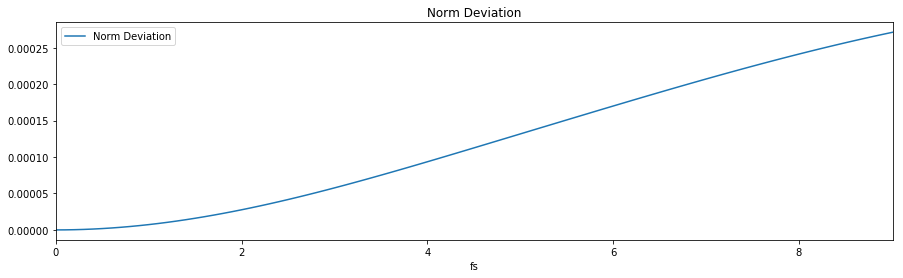

In [12]:
data.plot(title = 'Norm Deviation', x='fs', y = 'Norm Deviation', figsize=(15,4));

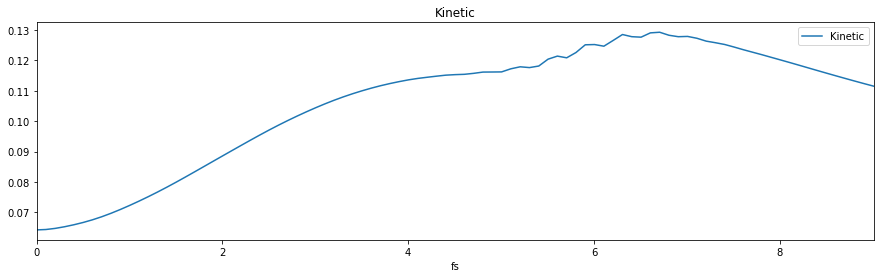

In [13]:
data.plot(title = 'Kinetic', x='fs', y = 'Kinetic', figsize=(15,4));

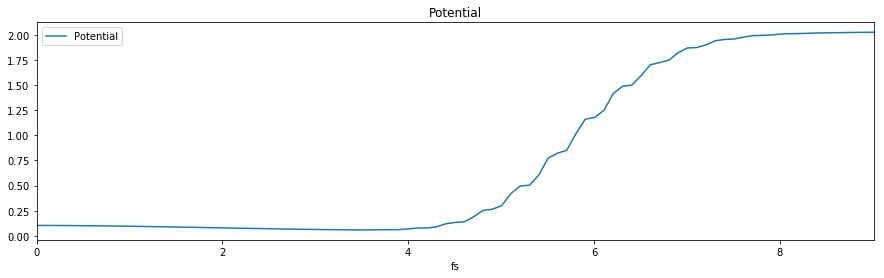

In [14]:
data.plot(title = 'Potential', x='fs', y = 'Potential', figsize=(15,4));

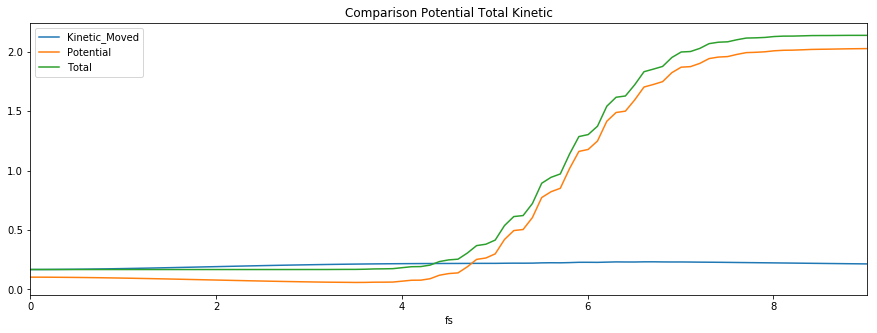

In [15]:
data['Kinetic_Moved'] = data['Kinetic'] + data['Potential'][0]
data.plot(title = 'Comparison Potential Total Kinetic', x=['fs'] ,y=['Kinetic_Moved','Potential','Total'], figsize=(15,5));

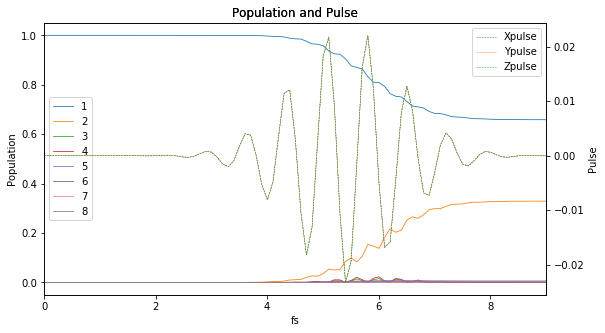

In [16]:
fig = plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set_ylabel('Population')
ax2.set_ylabel('Pulse')
popul = np.arange(nstates)+1
result.plot(title = 'Population and Pulse', ax = ax1,  x=['fs'] ,y=popul, linewidth=0.8)
result.plot(title = 'Population and Pulse', ax = ax2,  x=['fs'] ,y=['Xpulse','Ypulse','Zpulse'], linewidth=0.5,ls='--');


### Expected values

In [17]:
def expected(h5file):
    wf  = qp.retrieve_hdf5_data(h5file,'WF')
    _,_,nstates = wf.shape
    for i in range(nstates):
        wfState = wf[:,:,i]
        popu = np.linalg.norm(wfState) # this is norm, the real popu is this squared
        if popu == 0:
            print('Expected Values State {}:\nPopul: {:10.3f} \nTheta: - \nGamma: -'.format(i, popu**2, theA, gamA))
        else:
            wfA = abs2(wfState/popu)
            gamAvg = np.sum(wfA,axis=1)
            theAvg = np.sum(wfA,axis=0)
            gamA = sum([ gamsT[i] * gamAvg[i] for i in range(gamAvg.size) ])
            theA = sum([ thesT[i] * theAvg[i] for i in range(theAvg.size) ])
            print('Expected Values State {}:\nPopul: {:10.3f} \nTheta: {:10.3f} \nGamma: {:10.3f}'.format(i, popu, theA, gamA))

def fexp(x):
    return expected(os.path.join(a,filesList[x]))

In [18]:
interact(fexp, x = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV));

interactive(children=(IntSlider(value=90, description='x', max=90), Output()), _dom_classes=('widget-interact'…

# Initial condition differences

In [19]:
# filesList

In [20]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

def plotWF(wf):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    #something I do not like here, as X and Y are not in the order I like...
    X,Y = np.meshgrid(thesT,gamsT)

    ax.plot_wireframe(X, Y, wf.real, alpha=0.3)
    ax.plot_wireframe(X, Y, wf.imag, alpha=0.2, color='orange')
    print(wf.shape)

In [21]:
def plotdiffStates(state,frame):
    wf0  = qp.retrieve_hdf5_data(os.path.join(a,filesList[frame]),'WF')
    _,_,nstates = wf0.shape
    return plotWF(wf0[:,:,state])

interact(plotdiffStates, state = widgets.IntSlider(min=0,max=nstates-1,step=1,value=0),frame = widgets.IntSlider(min=0,max=lastV,step=1,value=0));

interactive(children=(IntSlider(value=0, description='state', max=7), IntSlider(value=0, description='frame', …